In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import surp
import arya

In [13]:
gso = pd.read_csv("gso_dwarfs.csv")

In [14]:
galah = pd.read_csv("galah_dwarfs.csv")

In [15]:
subgiants = surp.subgiants
v21 = surp.vincenzo2021()

/users/PAS2232/aeyobd/surp/surp/vincenzo.py:38: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  return pd.DataFrame(df, dtype=float)


In [27]:
v21["MG_H"] = v21["[mg/h]"]
v21["C_MG"] = v21["[c/mg]"]
v21["FE_H"] = v21["[fe/h]"]
v21["MG_FE"] = v21["[mg/fe]"]

In [16]:
def c_scatter(df, **kwargs):
    fig, axs = plt.subplots(1, 2, sharey=True, figsize=(6, 2.5), gridspec_kw={"wspace": 0})
    
    plt.sca(axs[0])
    plt.scatter(df.MG_H, df.C_MG, **kwargs)
    plt.ylabel("[C/Mg]")
    plt.xlabel("[Mg/H]")
    
    plt.sca(axs[1])
    plt.scatter(df.MG_FE, df.C_MG, **kwargs)
    plt.xlabel("[Mg/Fe]")

In [17]:
def fe_scatter(df, **kwargs):
    fig, axs = plt.subplots(1, 2, figsize=(6, 2.5))
    
    plt.sca(axs[0])
    plt.hist2d(df.MG_H, df.MG_FE, **kwargs)
    plt.ylabel("[Mg/Fe]")
    plt.xlabel("[Mg/H]")
    
    plt.sca(axs[1])
    plt.hist(df.FE_H)
    plt.xlabel("[Fe/H]")

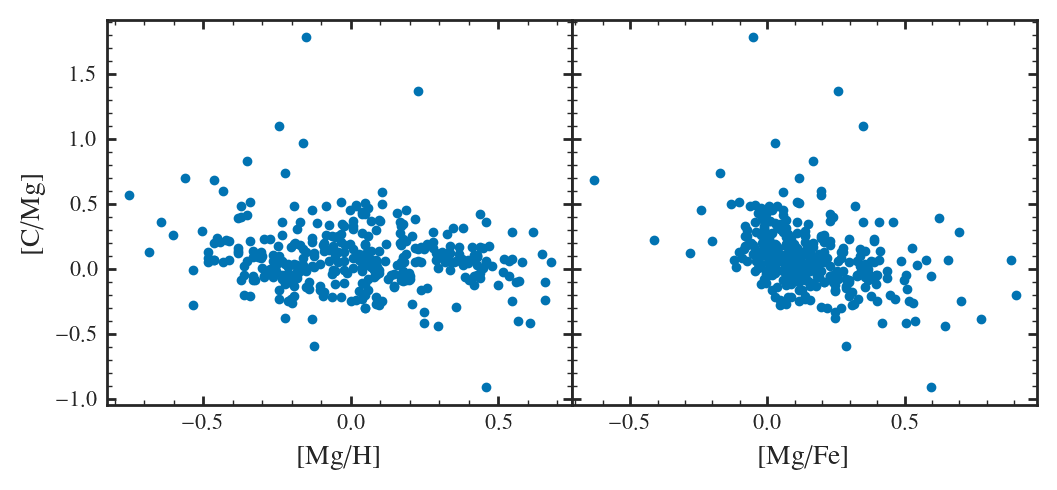

In [18]:
c_scatter(gso)

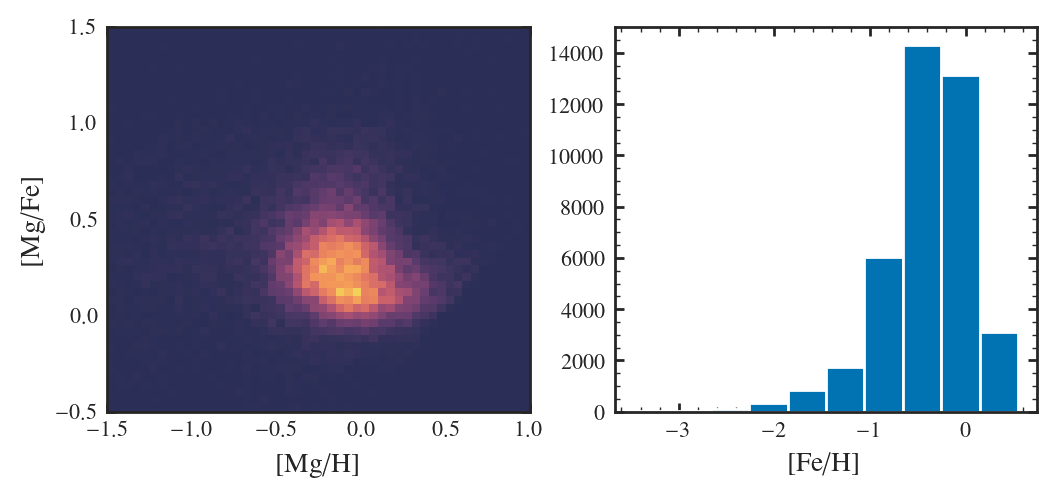

In [19]:
fe_scatter(gso, range=([-1.5, 1], [-0.5, 1.5]), bins=50)

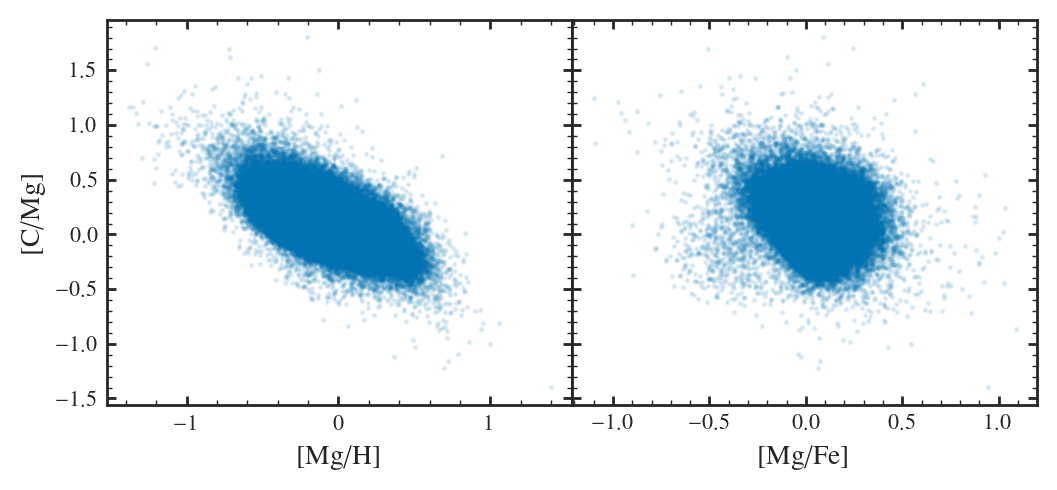

In [20]:
c_scatter(galah, alpha=0.1, s=1)

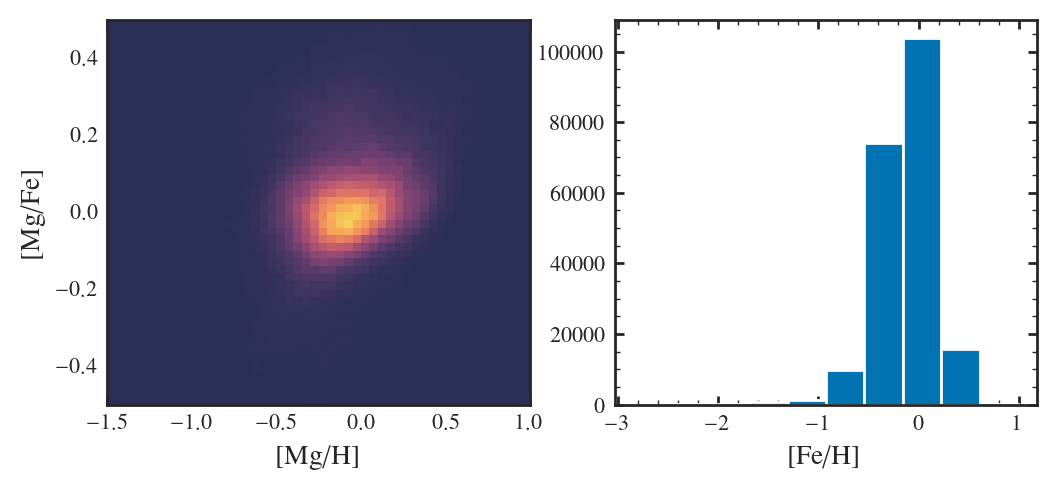

In [21]:
fe_scatter(galah, range=([-1.5, 1], [-0.5, 0.5]), bins=50)

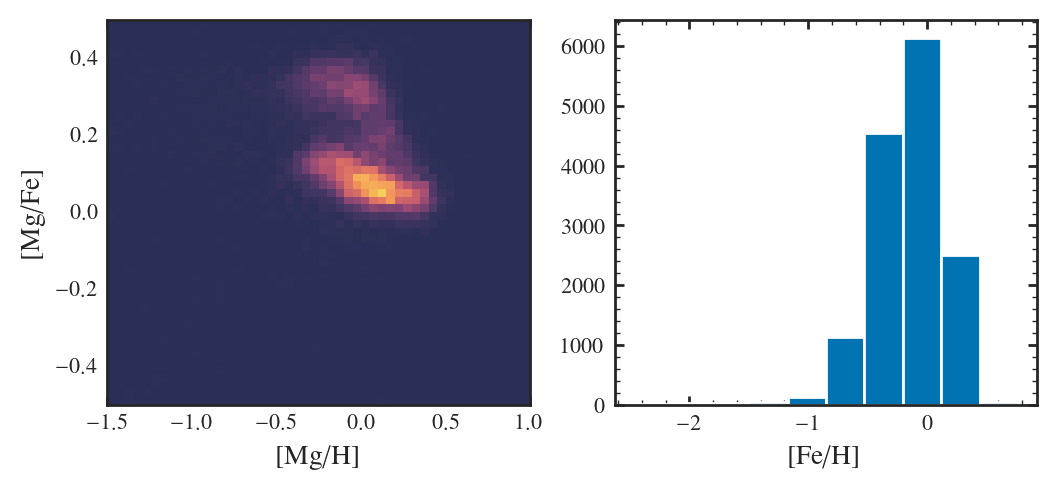

In [23]:
fe_scatter(subgiants, range=([-1.5, 1], [-0.5, 0.5]), bins=50)

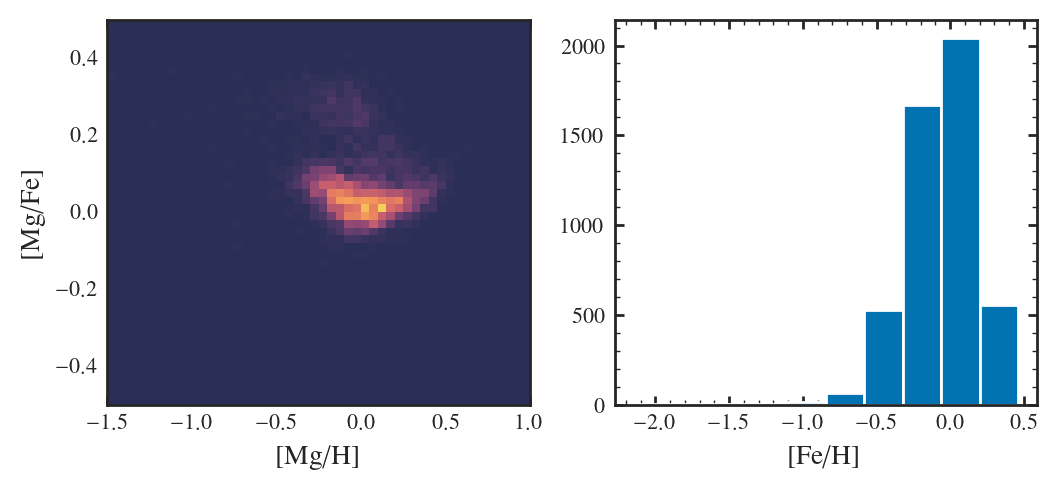

In [28]:
fe_scatter(v21, range=([-1.5, 1], [-0.5, 0.5]), bins=50)

In [ ]:
arya.medianplo

In [43]:
filt = np.isfinite(gso.C_MG)

Text(0, 0.5, '[C/Mg]')

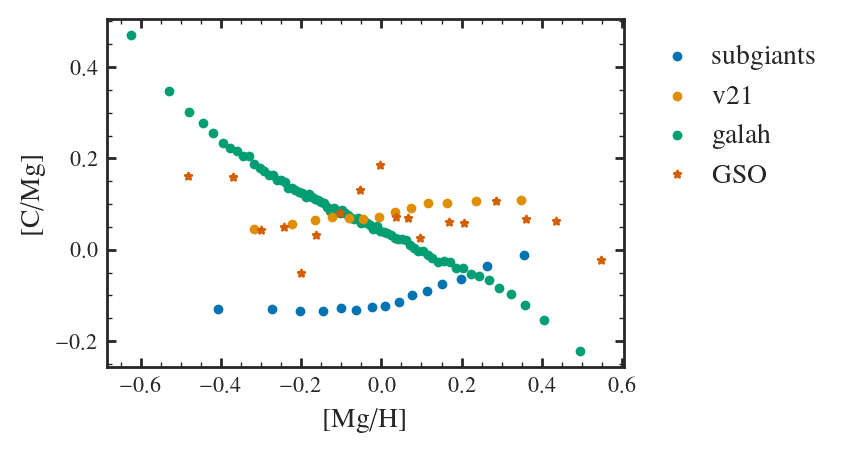

In [85]:
arya.medianplot(subgiants, "MG_H", "C_MG", binsize=1000, errorbar=None, label="subgiants")

arya.medianplot(v21, "MG_H", "C_MG", binsize=400, errorbar=None, label="v21", zorder=2)

arya.medianplot(galah, "MG_H", "C_MG", binsize=2000, errorbar=None, label="galah", zorder=0)


arya.medianplot(gso[filt],"MG_H", "C_MG", binsize=20, errorbar=None, label="GSO", marker="*", zorder=4)
arya.Legend(loc=-1)

plt.xlabel("[Mg/H]")
plt.ylabel("[C/Mg]")

Text(0, 0.5, '[C/Mg]')

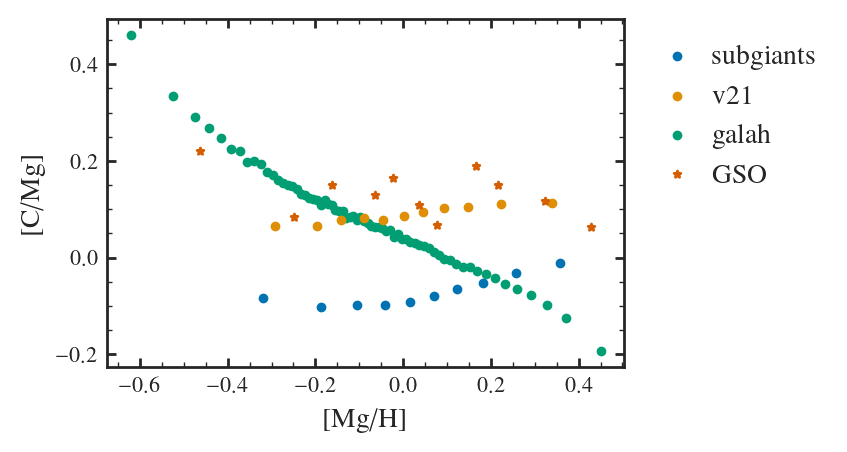

In [86]:

arya.medianplot(subgiants[~subgiants.high_alpha], "MG_H", "C_MG", binsize=1000, errorbar=None, label="subgiants")

arya.medianplot(v21[~v21.high_alpha], "MG_H", "C_MG", binsize=400, errorbar=None, label="v21", zorder=2)

arya.medianplot(galah[~galah_ha], "MG_H", "C_MG", binsize=2000, errorbar=None, label="galah", zorder=0)


arya.medianplot(gso[filt & ~gso_ha],"MG_H", "C_MG", binsize=20, errorbar=None, label="GSO", marker="*", zorder=4)
arya.Legend(loc=-1)

plt.xlabel("[Mg/H]")
plt.ylabel("[C/Mg]")

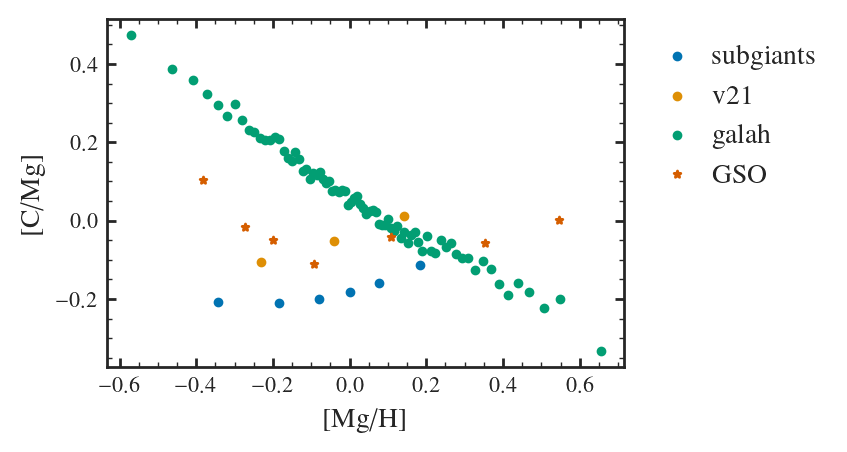

In [89]:

arya.medianplot(subgiants[subgiants.high_alpha], "MG_H", "C_MG", binsize=1000, errorbar=None, label="subgiants")

arya.medianplot(v21[v21.high_alpha], "MG_H", "C_MG", binsize=200, errorbar=None, label="v21", zorder=2)

arya.medianplot(galah[galah_ha], "MG_H", "C_MG", binsize=200, errorbar=None, label="galah", zorder=0)


arya.medianplot(gso[filt & gso_ha],"MG_H", "C_MG", binsize=20, errorbar=None, label="GSO", marker="*", zorder=4)
arya.Legend(loc=-1)

plt.xlabel("[Mg/H]")
plt.ylabel("[C/Mg]")

plt.savefig("cmg_mgh_allstar.pdf")


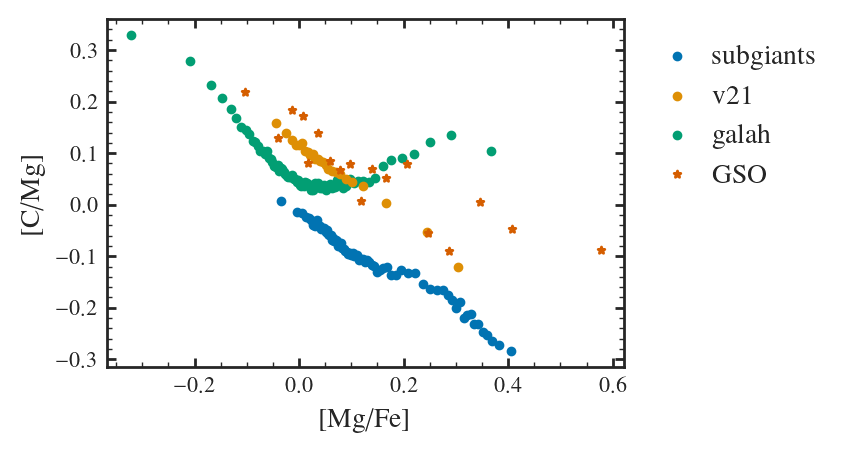

In [88]:
arya.medianplot(subgiants, "MG_FE", "C_MG", binsize=200, errorbar=None, label="subgiants")

arya.medianplot(v21, "MG_FE", "C_MG", binsize=200, errorbar=None, label="v21", zorder=2)

arya.medianplot(galah, "MG_FE", "C_MG", binsize=2000, errorbar=None, label="galah", zorder=0)


arya.medianplot(gso[filt],"MG_FE", "C_MG", binsize=20, errorbar=None, label="GSO", marker="*", zorder=4)
arya.Legend(loc=-1)

plt.xlabel("[Mg/Fe]")
plt.ylabel("[C/Mg]")
plt.savefig("cmg_mgfe_allstar.pdf")

In [73]:
galah_ha = surp.gce_math.is_high_alpha(galah.MG_FE, galah.FE_H)
gso_ha = surp.gce_math.is_high_alpha(gso.MG_FE, gso.FE_H)